In [157]:
import numpy as np
import pandas as pd
from IPython.display import Image
Image(url='http://datascience.uci.edu/wp-content/uploads/sites/2/2014/09/data_science_logo_with_image1.png')

## Before Lunch:
We created a linear model and saw that it performed well on already seen data but poorly on unseen data.

## Predictive Modeling
What we saw above is a common setup.  We have $\mathbf{X}$ and $\mathbf{y}$ data from the past and $\mathbf{X}$ data for the present for which we want to **predict** the future $\mathbf{y}$ values.

We can generalize this notion of past / present data into what's generally called **train** and **test** data.

* **Training Data** -- A dataset that we use to train our model.  We have both $\mathbf{X}$ and $\mathbf{y}$
* **Testing Data** -- A dataset which only has $\mathbf{X}$ values and for which we need to predict $\mathbf{y}$ values.  We might also have access to the real $\mathbf{y}$ values so that we can test how well our model will perform on data it hasn't seen before.

### <span style="color:red">Model Fitting Exercise: 10 Minutes</span>
1. Partner up.  On one computer:
  1. Write a function with the call signature `predict_test_values(model, X_train, y_train, X_test)` where model is a scikit learn model
    1. Fit the model on `X_train` and `y_train`
    1. Predict the y values for `X_test`
    1. Return a vector of predicted y values
  1. Write a second function with the call signature `calc_train_and_test_error(model, X_train, y_train, X_test, y_test)`
    1. Fit the model on `X_train` and `y_train`
    1. Predict the y values for `X_test`
    1. Predict the y values for `X_train`
    1. Calculate the `mean_squared_error` on both the train and test data.
    1. Return the train error and test error
  1. Describe to your partner the situations in which you might use each function

In [160]:
def mean_squared_error(y_true, y_pred):
    """
    calculate the mean_squared_error given a vector of true ys and a vector of predicted ys
    """
    diff = y_true - y_pred
    return np.dot(diff, diff) / len(diff)

def predict_test_values(model, X_train, y_train, X_test):
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME

    model.fit(X_train, y_train)
    return model.predict(X_test)

    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME

def calc_train_and_test_error(model, X_train, y_train, X_test, y_test):

    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    error_train = mean_squared_error(y_train, y_pred_train)
    error_test = mean_squared_error(y_test, y_pred_test)

    return error_train, error_test

    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME


## The Central Thesis of Machine Learning
###<span style="color:green">**1) A predictive model is only as good as its predictions on unseen data **</span>
###<span style="color:green">**2) Error on the dataset we trained on is not a good predictor of error on future data**</span>

Why isn't error on the training data a good indicator of future performance?  Overfitting.

### Overfitting in A Picture

In [161]:
Image(url='http://radimrehurek.com/data_science_python/plot_bias_variance_examples_2.png')

## How to Fight Overfitting?
Ultimately we don't want to build a model which performs well on data we've already seen, we want to build a model which will perform well on data we haven't seen.

There are two linked strategies for to accomplish this: **regularization** and **model selection**.

## Regularization
The idea in regularization is that we're going to modify our loss function to penalize us for being too complex. Simple models are better.

One way to do this is to try to keep our regression coefficients small. Why would we want to do this? One intuitive explanation is that if we have big regression coefficients we'll get large changes in the predicted value from small changes in input value.  That's bad. Intuitively, our predictions should vary smoothly with the data.

So a model with smaller coefficients makes smoother predictions.  It is simpler, which means it will have a harder time overfitting. 

We can change our linear regression loss function to help us reduce overfitting. 

###Linear Regression Loss Function
\begin{eqnarray*}
    Loss(\beta) = MSE &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat y_i)^2 \\
    &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 \\   
\end{eqnarray*}

###L2 Regularized Linear Regression Loss Function -- "Ridge"
\begin{eqnarray*}
    Loss(\beta) &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 + \alpha ||\beta||_2^2\\
    &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 + \alpha \beta^T \beta\\
    &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 + \alpha \sum_{d=1}^D \beta_d^2\\
\end{eqnarray*}

We won't get into details, but a ridge regression model can be optimized in much the same way as an unregularized linear regression: either with using some form of gradient descent or matrix-based solutions. 

In [162]:
# Ridge Regression in scikit-learn
from sklearn import linear_model
model_ridge = linear_model.Ridge(alpha = .5)

# once it's been fit, you can look at the learned beta values of the model with: model_ridge.coef_

### <span style="color:red">Ridge Regression Errors: 6 Minutes</span>
1. Partner up.  On one computer:
  1. Using your `calc_train_and_test_error` function from the previous exercise:
    1. Calculate the training and testing error for a LinearRegression model on the dataset below
    1. Calculate the training and testing error for a Ridge regression model with `alpha=1` on the dataset below
  1. Add up the absolute values of the first 10 coefficients of each model. Which is bigger?

     **Note:** If you have a fit model called `m`, then you can access a vector holding its learned coefficients with `m.coef_`.  
      
     **Note:** Check out the functions `np.sum()` and `np.abs()`

  1. Discuss with your partner what's happening here

In [173]:
# load overfitting data
with np.load('data/overfitting_data.npz') as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']


########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME

model_lr = linear_model.LinearRegression()
model_ridge = linear_model.Ridge(alpha = 1)

print "Linear Regression Training and Test Errors:"
print calc_train_and_test_error(model_lr, x_train, y_train, x_test, y_test)
print

print "Ridge Regression Training and Test Errors:"
print calc_train_and_test_error(model_ridge, x_train, y_train, x_test, y_test)
print

print "Sum of Linear Regression Coefficients:"
print np.sum(np.abs(model_lr.coef_))
print

print "Sum of Ridge Regression Coefficients:"
print np.sum(np.abs(model_ridge.coef_))
print

########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME


Linear Regression Training and Test Errors:
(2.4835421623895294e-05, 283.52728792173548)

Ridge Regression Training and Test Errors:
(0.018634112597992469, 9.564156068373217)

Sum of Linear Regression Coefficients:
338.387469048

Sum of Ridge Regression Coefficients:
62.4912904062



###L1 Regularized Linear Regression Loss Function -- "LASSO"
LASSO is another regularization method.  It penalizes not with the square of the regression coefficients (the $\beta$s) by their absolute value.  

LASSO has the additional property that it tends to push beta values of unimportant dimensions all the way to exactly 0.  This has the beneficial property of enforcing sparsity in our model.  If small coefficients lead to a simpler model, 0-valued coefficients 

\begin{eqnarray*}
    Loss(\beta) &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 + \alpha ||\beta||_1\\
    &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 + \alpha \sum_{d=1}^D |\beta_d|\\
\end{eqnarray*}

In [174]:
# LASSO in scikit-learn
from sklearn import linear_model
model_lasso = linear_model.Lasso(alpha = 0.5)

### <span style="color:red">LASSO Coefficients and Errors: 6 Minutes</span>
1. Partner up.  On one computer:
  1. Using your `calc_train_and_test_error` again, calculate the training and testing error for a LASSO model with `alpha=1` on the dataset from the previous exercise
  1. Add up the absolute values of the coefficients of the LASSO model. Compare it to the sums from the LinearRegression and Ridge models.
  1. Look at the first 10 coefficients of the LinearRegression, Ridge, and LASSO models.  
  1. Discuss with your partner what's happening here

In [175]:
# Write your code here

########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME

model_lasso = linear_model.Lasso(alpha = 1)

print 'LASSO Errors:'
print calc_train_and_test_error(model_lasso, x_train, y_train, x_test, y_test)
print 

print 'Sum of LASSO Coefficients'
print np.sum(np.abs(model_lasso.coef_))
print 

n_disp_coefs = 10

print 'Linear Regression Coefficients:'
print model_lr.coef_[:n_disp_coefs]
print

print 'Ridge Regression Coefficients:'
print model_ridge.coef_[:n_disp_coefs]
print

print 'LASSO Coefficients:'
print model_lasso.coef_[:n_disp_coefs]
print

########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME


LASSO Errors:
(4.1142351854727739, 4.6028697944107169)

Sum of LASSO Coefficients
2.88729174216

Linear Regression Coefficients:
[  5.22757470e-01   2.78289824e+00   4.04383818e+00   1.17544241e+00
   3.13230537e-01  -1.28127160e-01   5.11682173e-01   3.83754833e-03
  -1.19481096e+00   9.56448172e-01]

Ridge Regression Coefficients:
[ 1.01611626  1.77246927  3.06534773 -0.0333898   0.04378713  0.10472107
 -0.13445823  0.12656315  0.05779722  0.10204281]

LASSO Coefficients:
[ 0.03375129  0.92694409  1.92659636  0.          0.          0.         -0.
  0.          0.          0.        ]



###L1 + L2 Regularized Linear Regression Loss Function -- "ElasticNet"
\begin{eqnarray*}
    Loss(\beta) &=& \frac{1}{2N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 + \alpha \rho ||\beta||_1 + \frac{\alpha (1 - \rho)}{2} ||\beta||_2^2\\\\
    &=& \frac{1}{2N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 + \alpha \rho \sum_{d=1}^D |\beta_d| + \frac{\alpha (1 - \rho)}{2} \sum_{d=1}^D \beta_d^2\\
\end{eqnarray*}

In [176]:
from sklearn import linear_model
model_en = linear_model.ElasticNet(alpha=0.5, l1_ratio=0.1)

# note: scikit learn's current implementation of ElasticNet isn't stable with l1_ratio <= 0.01

### <span style="color:red">ElasticNet Coefficients and Errors: 4 Minutes</span>
1. Partner up.  On one computer:
  1. Using your `calc_train_and_test_error` again, calculate the training and testing error for an ElasticNet model with `alpha=1` and `l1_ratio=0.5` on the dataset from the previous exercises
  1. Add up the absolute values of the first 10 coefficients of the ElasticNet model. Compare it to the sums from the LinearRegression, Ridge, and LASSO models.
  1. Look at the first 10 coefficients of the ElasticNet model.  
  1. Discuss with your partner what's happening here

In [177]:
# Write your code here

########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME

model_en = linear_model.ElasticNet(alpha=1, l1_ratio=0.5)

print 'ElasticNet Errors:'
print calc_train_and_test_error(model_en, x_train, y_train, x_test, y_test)
print 

print 'Sum of ElasticNet Coefficients'
print np.sum(np.abs(model_en.coef_))
print 

n_disp_coefs = 10

print 'ElasticNet Coefficients:'
print model_en.coef_[:n_disp_coefs]
print

########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME


ElasticNet Errors:
(4.2520891992612748, 4.7736076942707788)

Sum of ElasticNet Coefficients
2.92041057644

ElasticNet Coefficients:
[ 0.36672086  0.95411512  1.5995746   0.          0.          0.         -0.
  0.          0.          0.        ]



## Cross Validation
Now we know three types of regularization for linear regression: ridge regression, LASSO, and elastic net.  

All of our regularized models had better test error that simple linear regression.  But how should we choose which model to ultimatley use or which parameters to use?  The answer is **cross validation**.

There are many forms of cross validation.  The basic idea of each is to _train_ your model on some data and _estimate it's future performance_ on other data.

## Types of Cross Validation
### Validation Set Cross Validation
1. Pick an amount of training data to be in your validation set (e.g. 10%)
2. Randomly split datapoints into training points (90%) and validation points (10%)
3. Train your model on the training data
4. Test your model on the validation data, record the validation error
5. Estimated future errors is the validation error


* **Good:** Easy and computationally cheap
* **Bad:** Statistically noisy and wastes data


**Aside:** Validation set cross validation is almost identical to what we've been doing so far by calculating the error on our test dataset, but with two significant differences:
1. We don't have to peek at our test data set.  This is good because if we do that too much, we can actually still overfit to our test data and still perform poorly on future unseen data.
1. We don't have to be given the $\mathbf{y}$ vector for our test dataset. Validation set cross validation only requires a training dataset.

In [185]:
# a helper function for performing validation set cross validation
from sklearn.cross_validation import train_test_split
validation_portion = 0.1
seed = 1234
x_train_small, x_valid, y_train_small, y_valid = \
    train_test_split(x_train, y_train, test_size=validation_portion, random_state=seed)

print 'Original Training Set Size:'
print x_train.shape, y_train.shape
print

print 'Reducted Training Set Size:'
print x_train_small.shape, y_train_small.shape
print

print 'Validation Set Size:'
print x_valid.shape, y_valid.shape
print


Original Training Set Size:
(600, 598) (600,)

Reducted Training Set Size:
(540, 598) (540,)

Validation Set Size:
(60, 598) (60,)



#### <span style="color:red">Validation Set Cross Validation Exercise: 12 Minutes</span>
1. Partner up.  On one computer:
  1. Write a function with the call signature `validation_set_error(model, x_train, y_train, validation_portion=0.1, seed=1234)` which returns the validation set estimate of the future error for the given `model`. This function should:
    1. Split the data into a reduced training set and a validation set
    1. Train on the reduced training set
    1. Estimate the mean squared error on the validation set
    1. Return that estimate
  1. Use your `calc_train_and_test_error(model, X_train, y_train, X_test, y_test)` function to calculate training and test set errors for these 
  1. Use this your `validation_set_error` function to estimate the future error on the overfitting data for:
    1. A linear regression model
    1. A ridge regression models with `alpha` = 10
  1. Do this for multiple random seeds
  1. Does validation error do a good job of predicting test error?
  1. If you have time: How does changing the validation_portion affect the similarity between the validation and test error?


In [230]:
def validation_set_error(model, x_train, y_train, validation_portion=0.1, seed=1234):
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME

    x_train_small, x_valid, y_train_small, y_valid = \
        train_test_split(x_train, y_train, test_size=validation_portion, random_state=seed)
    model.fit(x_train_small, y_train_small)
    y_pred_valid = model.predict(x_valid)
    return mean_squared_error(y_valid, y_pred_valid)

# set up models
model_lr_valid = linear_model.LinearRegression()
model_ridge_valid = linear_model.Ridge(alpha=10)

# calculate errors
valid_portion = .1
n_seeds = 5
print "Linear Regression Training and Test Errors:"
print calc_train_and_test_error(model_lr_valid, x_train, y_train, x_test, y_test)
print
print "Linear Regression Validation Errors:"
for seed in range(n_seeds):
    print validation_set_error(model_lr_valid, x_train, y_train, validation_portion=valid_portion, seed=seed)
    print

print "Ridge Regression Training and Test Errors:"
print calc_train_and_test_error(model_ridge_valid, x_train, y_train, x_test, y_test)
print
print "Ridge Regression Validation Errors:"
for seed in range(n_seeds):
    print validation_set_error(model_ridge_valid, x_train, y_train, validation_portion=valid_portion, seed=seed)
    print

########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME

Linear Regression Training and Test Errors:
(2.4835421623895294e-05, 283.52728792173548)

Linear Regression Validation Errors:
9.44958288788

11.534546517

11.8057845076

10.7606395757

7.60088829288

Ridge Regression Training and Test Errors:
(0.06406324343262465, 4.9205415455727231)

Ridge Regression Validation Errors:
3.61817500364

7.12476980873

5.32580668571

5.74292650031

4.6239411424



### K-Fold Cross Validation
1. Partition the training data into K folds
2. For each fold k:
  1. Train the model on all your data except the data in fold k
  2. Record the error on the the data in fold k
3. Estimate future error as average error across all folds


* **Good:** Only wastes 100/k% of the data at a time
* **Bad:** Takes k times long as just training one model, still wastes 100/k% of the data

In [188]:
Image(url='https://chrisjmccormick.files.wordpress.com/2013/07/10_fold_cv.png')

In [ ]:
# scikit learn provides a useful object to help you perform kfold cross validation
from sklearn.cross_validation import KFold

n_data = len(y_train)
fold_count = 0
for train_reduced_row_ids, valid_row_ids in KFold(n_data, n_folds=4):
    print
    print 
    print "FOLD %d:" % fold_count
    print "-------"
    print("train_ids:\n%s\n\nvalid_ids\n%s" % (train_reduced_row_ids, valid_row_ids))
    x_train_reduced = x_train[train_reduced_row_ids]
    y_train_reduced = y_train[train_reduced_row_ids]
    x_valid = x_train[valid_row_ids]
    y_valid = y_train[valid_row_ids]
    fold_count += 1

In [212]:
# NOTE: KFolds isn't random at all.  It's important to shuffle your data first before using it. 
from sklearn.utils import shuffle
x_train_shuffled, y_train_shuffled = shuffle(x_train, y_train)

#### <span style="color:red">K-Fold Cross Validation Exercise: 15 Minutes</span>
1. Partner up.  On one computer:
  1. Write a function with the call signature `kfold_error(model, x_train, y_train, k=4, seed=1234)` which returns the k-fold cross validation estimate of the future error for the given `model`. This function should:
    1. Shuffle the training data set (both $\mathbf{x}$ and  $\mathbf{y}$ in unison)
    1. For each fold:
        1. Split the data into a reduced training set and a validation set
        1. Train on the reduced training set
        1. Estimate the mean squared error on the validation set
        1. Add the estimated error to a running sum of the estimated total error
    1. Return the average error across folds: i.e.: the estimated total error divided by the number of folds
  1. Use your `calc_train_and_test_error(model, X_train, y_train, X_test, y_test)` function to calculate training and test set errors for these 
  1. Use your `kfold_error` function with k=5 to estimate the future error on the overfitting data for:
    1. A linear regression model
    1. A ridge regression models with `alpha` = 10
  1. Do this for multiple random seeds
  1. Does k-fold error do a good job of predicting test error?

In [252]:
def kfold_error(model, x_train, y_train, k=4, seed=1234):
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME

    # shuffle training data
    x_train_shuffled, y_train_shuffled = shuffle(x_train, y_train, random_state=seed)

    total_error = 0
    
    n_data = len(y_train)
    for train_reduced_row_ids, valid_row_ids in KFold(n_data, n_folds=k):
        x_train_reduced = x_train_shuffled[train_reduced_row_ids]
        y_train_reduced = y_train_shuffled[train_reduced_row_ids]
        x_valid = x_train_shuffled[valid_row_ids]
        y_valid = y_train_shuffled[valid_row_ids]
    
        model.fit(x_train_reduced, y_train_reduced)
        y_pred_valid = model.predict(x_valid)
        total_error += mean_squared_error(y_valid, y_pred_valid)

    return total_error / k
        
# set up models
model_lr_valid = linear_model.LinearRegression()
model_ridge_valid = linear_model.Ridge(alpha=10)

# calculate errors
n_seeds = 3
k = 4
print "Linear Regression Training and Test Errors:"
print calc_train_and_test_error(model_lr_valid, x_train, y_train, x_test, y_test)
print
print "Linear Regression K-Fold Errors:"
for seed in range(n_seeds):
    print kfold_error(model_lr_valid, x_train, y_train, k=k, seed=seed)
    print

print "Ridge Regression Training and Test Errors:"
print calc_train_and_test_error(model_ridge_valid, x_train, y_train, x_test, y_test)
print
print "Ridge Regression K-Fold Errors:"
for seed in range(n_seeds):
    print kfold_error(model_ridge_valid, x_train, y_train, k=k, seed=seed)
    print
    
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
    


Linear Regression Training and Test Errors:
(2.4835421623895294e-05, 283.52728792173548)

Linear Regression K-Fold Errors:
7.41098834699

7.09046178215

6.92725054326

Ridge Regression Training and Test Errors:
(0.06406324343262465, 4.9205415455727231)

Ridge Regression K-Fold Errors:
5.9769294139

6.27985257507

6.08750775999



## Model and Hyperparameter Selection with Cross Validation
1. For each model and hyperparameter combo you're willing to consider:
  1. Estimate the model's performance on future data using cross validation
2. Pick the model with the best estimated future performance
3. Train the best model from scratch on the full dataset.  This is your final model

In [256]:
def model_name(model):
    s = model.__str__().lower()
    if "linearregression" in s:
        return 'LinearRegression'
    elif "lasso" in s:
        return 'Lasso(a=%g)' % model.alpha
    elif "ridge" in s:
        return 'Ridge(a=%g)' % model.alpha
    elif "elastic" in s:
        return 'ElasticNet(a=%g, r=%g)' % (model.alpha, model.l1_ratio)
    else:
        raise ValueError("Unknown Model Type")

def create_models(alphas=(.01, .03, .1, .3, 1, 3), l1_ratios=(.7, .5, .3)):
    models = [linear_model.LinearRegression()]
    models.extend([linear_model.Ridge(a) for a in alphas])
    models.extend([linear_model.Lasso(a) for a in alphas])
    models.extend([linear_model.ElasticNet(a, l1_ratio=l) for a in alphas for l in l1_ratios])
    return models

def results_df(models, betas_true, x_train, y_train, x_test, y_test, k=4):
    n_data, n_dim = x_train.shape

    n_zeros = n_dim - len(betas_true)
    
    betas_true = np.concatenate([betas_true, np.zeros(n_zeros)])
    
    # fit models to training data
    [m.fit(x_train, y_train) for m in models]
    
    betas = np.vstack([betas_true] + [m.coef_ for m in models])
    beta_names = ['Beta ' + str(i) for i in range(n_dim)]

    # set up model names
    model_names =  ["True Coefs"] + [model_name(m) for m in models]
    df = pd.DataFrame(data=betas, columns=beta_names, index=model_names)

    # calculate training errors
    y_preds = [m.predict(x_train) for m in models]
    errors = [np.nan] + [mean_squared_error(y_train, y_pred) for y_pred in y_preds]
    df['Train Error'] = errors

    # calculate validation errors
    errors = [np.nan] + [kfold_error(m, x_train, y_train, k=k) for m in models]
    df['Cross Validation Error'] = errors

    # calculate test errors
    y_preds = [m.predict(x_test) for m in models]
    errors = [np.nan] + [mean_squared_error(y_test, y_pred) for y_pred in y_preds]
    df['Test Error'] = errors

    return df


# these are some of the magic parameters that I used to actually 
# generate the overfitting dataset
n_dim = 598
n_dim_meaningful = 3
n_dim_disp_extra = 2

# the actual betas used to generate the y values.  the rest were 0.
betas_true = np.arange(n_dim_meaningful) + 1

# create a whole bunch of untrained models
models = create_models(alphas=(.01, .03, .1, .3, 1), l1_ratios=(.9, .7, .5))

# 
all_results = results_df(models, betas_true, x_train, y_train, x_test, y_test, k=4)

# decide which columns we want to display
disp_cols = ["Beta " + str(i) for i in range(n_dim_meaningful + n_dim_disp_extra)] 
disp_cols += ['Train Error', 'Cross Validation Error', 'Test Error']

# display the results
all_results[disp_cols]

,Beta 0,Beta 1,Beta 2,Beta 3,Beta 4,Train Error,Validation Error,Test Error
True Coefs,1.000000,2.000000,3.000000,0.000000,0.000000,NaN,NaN,NaN
LinearRegression,0.522757,2.782898,4.043838,1.175442,0.313231,0.000025,7.093499,10.183823
Ridge(a=0.01),0.867059,2.290546,3.729941,0.570987,0.380292,0.001033,6.590630,8.592261
Ridge(a=0.03),1.028546,2.023949,3.548358,0.237767,0.370161,0.002749,6.588766,8.590441
Ridge(a=0.1),1.088696,1.847044,3.386562,0.012841,0.272410,0.005693,6.582288,8.584100
Ridge(a=0.3),1.065763,1.788885,3.247394,-0.050784,0.142292,0.010186,6.564170,8.566235
Ridge(a=1),1.016116,1.772469,3.065348,-0.033390,0.043787,0.018634,6.504991,8.506474
Lasso(a=0.01),1.076240,1.956283,2.955116,0.000000,0.025530,0.213388,1.701747,1.849997
Lasso(a=0.03),1.042435,1.941418,2.952131,0.000000,0.002460,0.526780,1.223279,1.196381
Lasso(a=0.1),0.972258,1.869852,2.892761,-0.000000,0.000000,0.968836,1.024546,0.895046


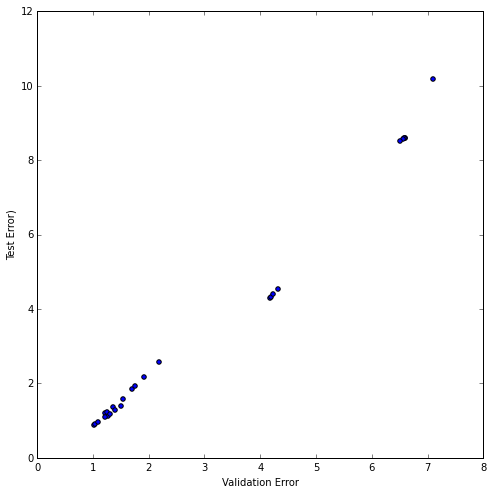

In [260]:
%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure()
plt.scatter(all_results['Cross Validation Error'], all_results['Test Error'])
plt.xlabel('Cross Validation Error')
plt.ylabel('Test Error)')
f.set_size_inches(8, 8)
plt.show()

In [253]:
# scikit learn includes some functions for making cross validation easier 
# and computationally faster for a some models
from sklearn import linear_model
model_ridge_cv = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
model_lasso_cv = linear_model.LassoCV(alphas=[0.1, 1.0, 10.0])
model_en_cv = linear_model.ElasticNetCV(l1_ratio=[.9], n_alphas=100)

## Caveats:
* You can still overfit with intensive cross validation based model selection!
* But it's much better than without

## Summary:
* **The Central Thesis of Machine Learning:** We're only interested in predictive performance on unseen data, NOT seen data.
* **Regularization** strategies change how to train a model so that it will perform better on unseen data
* We talked about three forms of regularization for linear regression:
  * **Ridge Regression** (L2 Penalty)
  * **LASSO** (L1 Penalty)
  * **ElasticNet** (L1 + L2 Penalties)
* **Training error** estimates error on **seen** data
* **Cross validation error** estimates error on **unseen** data
* We talked about two kinds of cross validation error:
  * **Validation Error** -- split your training set into a reduced training set and a validation set
  * **K-Fold Error** -- Split your training data into k reduced training sets and a validation sets
* Regularization introduces new hyperparameters
* Use a cross validated estimate of future performance to choose your model / hyperparameter settings